<h1>Introduction:</h1>

The dataset is credited to Ronny Kohavi and Barry Becker and was drawn from the 1994 United States Census Bureau data and involves using personal details such as education level to predict whether an individual will earn more or less than $50,000 per year.

In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\dhruv\\Downloads\\adult.csv")

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<h1>Data Exploration:</h1>

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Changing column names for better formatting:

In [8]:
df.rename(columns={'capital-gain':'capital gain', 'capital-loss':'capital loss', 'native-country':'native country',
                   'hours-per-week':'hours per week','marital-status':'marital status','educational-num':'educational num',
                  'fnlwgt':'final weight'},
          inplace=True)

In [9]:
df

,age,workclass,final weight,education,educational num,marital status,occupation,relationship,race,gender,capital gain,capital loss,hours per week,native country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<h2><i>Data Cleaning</i></h2>

In [11]:
df.isnull().sum() #checking null values

age                0
workclass          0
final weight       0
education          0
educational num    0
marital status     0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
native country     0
income             0
dtype: int64

In [12]:
df.isin(['?']).sum() #checking values ? as NaN

age                   0
workclass          2799
final weight          0
education             0
educational num       0
marital status        0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
native country      857
income                0
dtype: int64

<h4>Observation:</h4><ul><li>It is observed that columns workclass, occupation and native country have this special character.</li></ul> 

In [14]:
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native country'] = df['native country'].replace('?', np.nan)
#Replaced ? with NaN
#we get:

In [15]:
df.isin(['?']).sum()

age                0
workclass          0
final weight       0
education          0
educational num    0
marital status     0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
native country     0
income             0
dtype: int64

In [16]:
df.isnull().sum()

age                   0
workclass          2799
final weight          0
education             0
educational num       0
marital status        0
occupation         2809
relationship          0
race                  0
gender                0
capital gain          0
capital loss          0
hours per week        0
native country      857
income                0
dtype: int64

In [17]:
df.dropna(how='any', inplace=True) #dropping NaN values

In [18]:
df.isnull().sum()

age                0
workclass          0
final weight       0
education          0
educational num    0
marital status     0
occupation         0
relationship       0
race               0
gender             0
capital gain       0
capital loss       0
hours per week     0
native country     0
income             0
dtype: int64

<h5>Duplicates:</h5>

In [19]:
df.duplicated().sum()

47

In [20]:
df= df.drop_duplicates()

In [21]:
df.duplicated().sum()

0

<h4>Observation:</h4><ul><li>Duplicate values were found and removed successfully.</ul>

<h1>Univariate Analysis:</h1>

<AxesSubplot:>

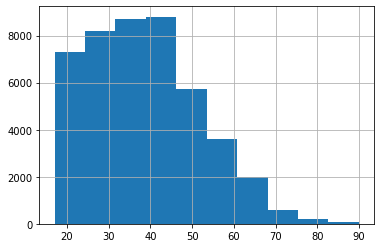

In [23]:
df['age'].hist()

<h4>Observation:</h4>This column has :<ul><li>Most of the age values between 17 to 50<li>25 % below age 28<li>50 % below age 37<li>75 % below age 47</ul>

In [24]:
len(df[df['age'].between(17,50)]) #people aged between 17 to 50

36495

<AxesSubplot:>

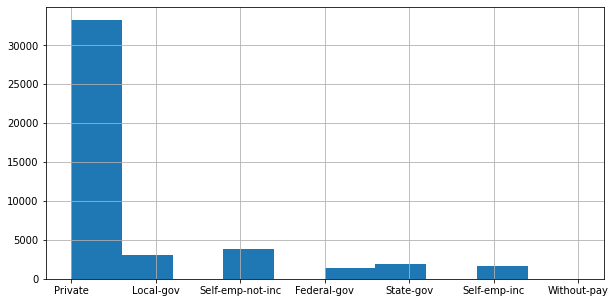

In [25]:
df['workclass'].hist(figsize=(10,5))

<h4>Observation:</h4><ul><li>Private sector contains maximum employees</ul>

In [26]:
len(df[df['education'].isin(['Bachelors', 'Masters'])]) # count of people with both bachelor and master degree

10072

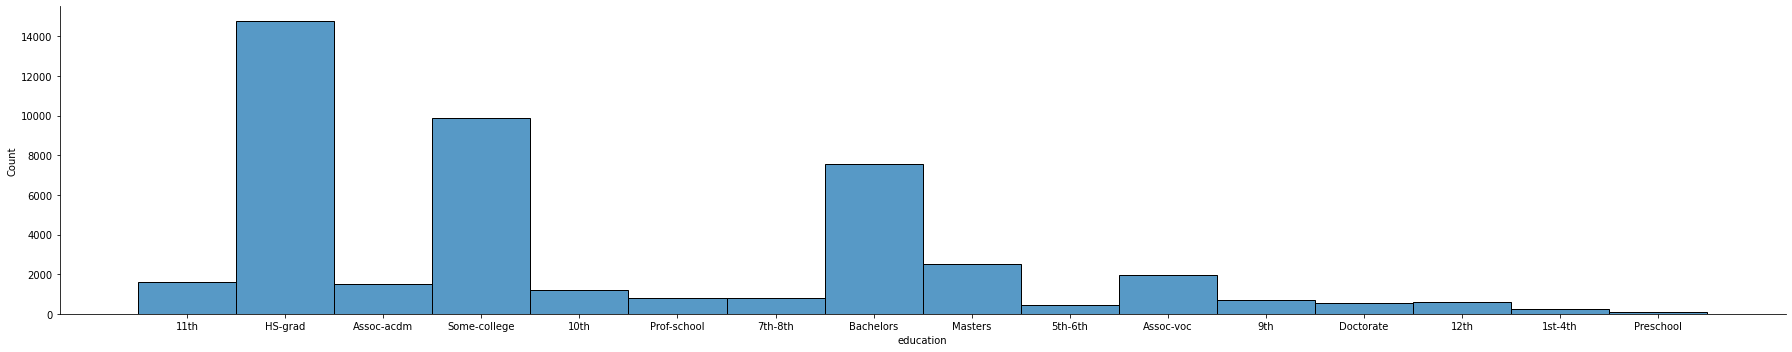

In [30]:
sns.displot(x=df['education'], aspect=5)

<h4>Observation:</h4><ul><li>Maximum are High School graduates.</ul>

<h1>Bivariate Analysis:</h1>

<AxesSubplot:xlabel='age', ylabel='income'>

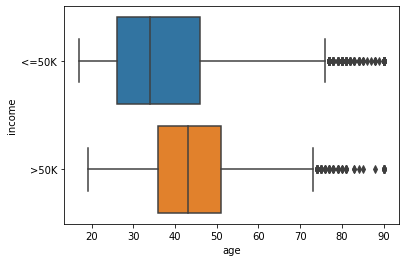

In [31]:
sns.boxplot(data=df, x='age', y='income')

<h4>Observation:</h4><ul><li>Maximum individuals having income less than or equal to 50K are between age 25 to 45<li>Maximum individuals having income more than 50K are between age 37 to 50</ul>

<AxesSubplot:xlabel='income', ylabel='count'>

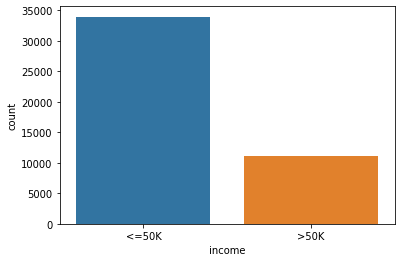

In [32]:
sns.countplot(data=df, x='income')

<h4>Observation:</h4><ul><li>Maximum individuals are having income less than or equal to 50K.</ul>

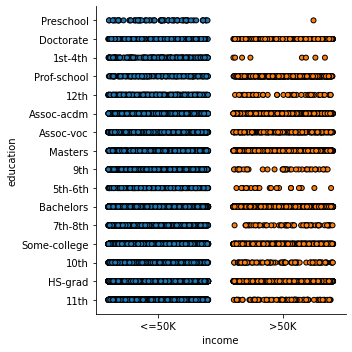

In [33]:
sns.catplot(data=df, x='income', y='education', jitter=0.4,linewidth=1,edgecolor='black') #for correlation between Education and Income

<h4>Observation:</h4><ul><li>People with income less than or equal to 50K belong to all the education levels.<li>People with income more than 50K have done higher degrees. </ul>

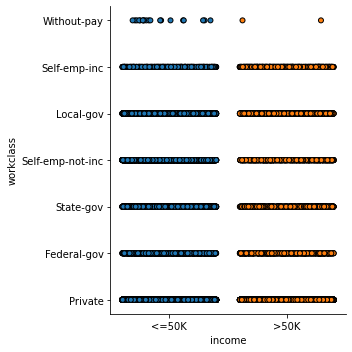

In [34]:
sns.catplot(data=df, x='income', y='workclass', jitter=0.4,linewidth=1,edgecolor='black')#correlation between workclass and income

<h4>Observation:</h4><ul><li>People with income less than or equal to 50K have good workclass.<li>People with income more than 50K have excellent workclass.</ul>

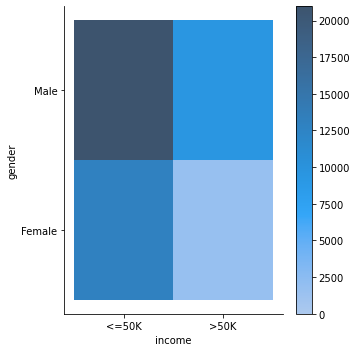

In [35]:
sns.displot(data=df, x='income', y='gender', cbar=True) #correlation between gender and income

<h4>Observation:</h4><ul><li>People with income less than or equal to 50K are mostly male and few female.<li>While people with  income more than 50K are mostly male and some female.</ul>

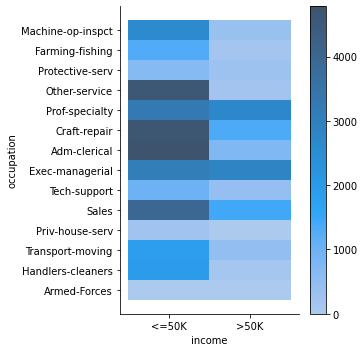

In [36]:
sns.displot(data=df, x='income', y='occupation',cbar=True) #correlation between income and occupation

<h4>Observation:</h4><ul><li>Maximum people with income less than or equal to 50K are mostly from Adm-clerical and Other-service.<li>While Maximum people with income more than 50K are mostly from Exec-managerial and Prof-specialty. </ul>

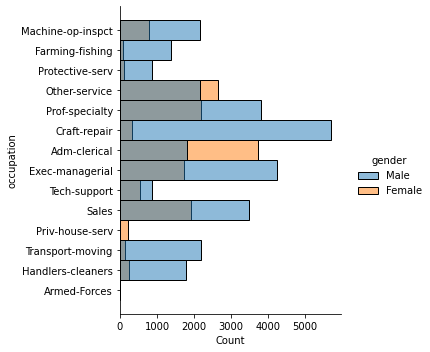

In [37]:
sns.displot(data=df, y='occupation', hue="gender") #correlation between gender and occupation

<h4>Observation:</h4><ul><li>Craft-repair are mostly males.<li>Adm-clerical are mostly females. </ul>

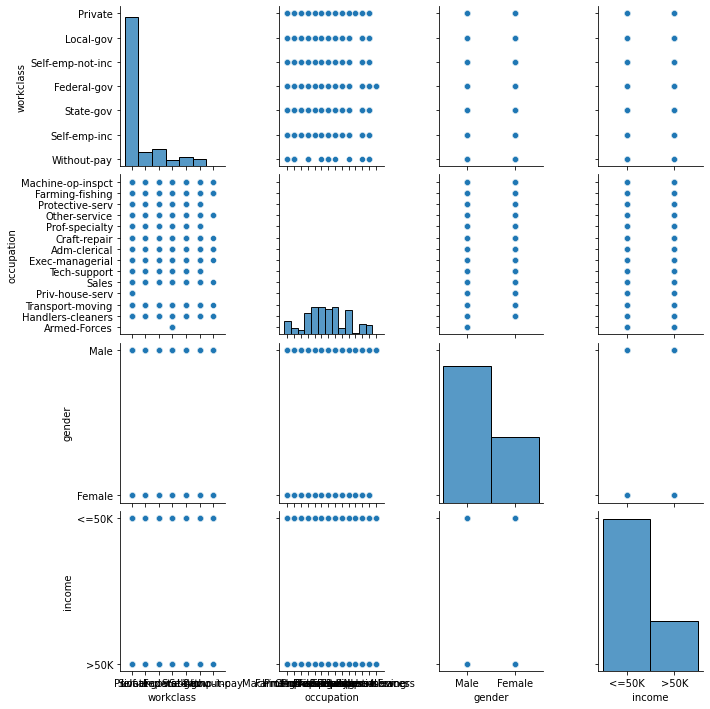

In [38]:
sns.pairplot(df, vars=['workclass','occupation','gender','income'])

<h1>Feature Engineering:</h1>

In [39]:
for col in df.columns:
    print("**-- %s --**" % col)
    print(df[col].value_counts())
    print("\n")
#unique values in each column are as :

**-- age --**
36    1283
33    1279
31    1273
35    1271
23    1237
      ... 
85       5
88       5
89       1
87       1
86       1
Name: age, Length: 74, dtype: int64


**-- workclass --**
Private             33262
Self-emp-not-inc     3795
Local-gov            3100
State-gov            1946
Self-emp-inc         1645
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64


**-- final weight --**
203488    21
125892    18
120277    18
113364    17
126569    17
          ..
171301     1
257764     1
168312     1
103440     1
257302     1
Name: final weight, Length: 26741, dtype: int64


**-- education --**
HS-grad         14770
Some-college     9887
Bachelors        7559
Masters          2513
Assoc-voc        1958
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           822
Prof-school       785
9th               676
12th              575
Doctorate         544
5th-6th           447
1st-4th           220
Preschool          70
Name:

In [40]:
df.drop(['educational num', 'hours per week', 'final weight', 'capital gain','capital loss', 'native country','age'], axis=1, inplace=True)

C:\Users\dhruv\AppData\Local\Temp\ipykernel_40668\2261089473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['educational num', 'hours per week', 'final weight', 'capital gain','capital loss', 'native country','age'], axis=1, inplace=True)


In [41]:
df

,workclass,education,marital status,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,<=50K
...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,<=50K


<h4>Observation:</h4><ul><li>Noisy columns dropped</ul>

In [42]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int) #data-mapping

C:\Users\dhruv\AppData\Local\Temp\ipykernel_40668\4076986583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int) #data-mapping


In [43]:
df

,workclass,education,marital status,occupation,relationship,race,gender,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,1
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,1
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0
...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,1
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0


<h1>Research Questions:</h1>

<h4>Is there a relationship between occupation and gender? (i.e. does the preference of occupation depend on the gender)</h4>


$ Null Hypothesis (H_0) : $ No relationship between two variables.

$ AlternateHypothesis (H_1) : $ Substantial relationship between variables.

In [44]:
from scipy.stats import chi2, chi2_contingency

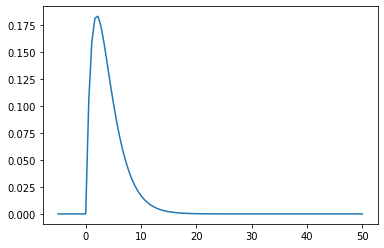

In [45]:
x = np.linspace(-5,50, 100)
y = chi2.pdf(x, df=4)
plt.plot(x, y)

In [46]:
df.occupation.value_counts()

Craft-repair         6010
Prof-specialty       6001
Exec-managerial      5980
Adm-clerical         5535
Sales                5405
Other-service        4805
Machine-op-inspct    2965
Transport-moving     2316
Handlers-cleaners    2045
Farming-fishing      1475
Tech-support         1419
Protective-serv       975
Priv-house-serv       230
Armed-Forces           14
Name: occupation, dtype: int64

In [47]:
df.gender.value_counts()

Male      30495
Female    14680
Name: gender, dtype: int64

In [49]:
con = pd.crosstab(df.occupation, df.gender)

In [50]:
con

gender,Female,Male
occupation,,
Adm-clerical,3725,1810
Armed-Forces,0,14
Craft-repair,315,5695
Exec-managerial,1724,4256
Farming-fishing,95,1380
Handlers-cleaners,253,1792
Machine-op-inspct,792,2173
Other-service,2641,2164
Priv-house-serv,216,14


In [51]:
chi2_contingency(con)

(8565.10300386568,
 0.0,
 13,
 array([[1798.6452684 , 3736.3547316 ],
        [   4.54941893,    9.45058107],
        [1953.0005534 , 4056.9994466 ],
        [1943.25179856, 4036.74820144],
        [ 479.31377975,  995.68622025],
        [ 664.54012175, 1380.45987825],
        [ 963.50193691, 2001.49806309],
        [1561.42556724, 3243.57443276],
        [  74.74045379,  155.25954621],
        [1950.07592695, 4050.92407305],
        [ 316.83453237,  658.16546763],
        [1756.40066408, 3648.59933592],
        [ 461.11610404,  957.88389596],
        [ 752.60387382, 1563.39612618]]))

In [55]:
chi2_test_stat = chi2_contingency(con)[0]
pval = chi2_contingency(con)[1]
df1 = chi2_contingency(con)[2]

In [56]:
confidence_level = 0.95
alpha = 1 - confidence_level
chi2_critical = chi2.ppf(1 - alpha, data)

In [57]:
chi2_critical

22.362032494826934

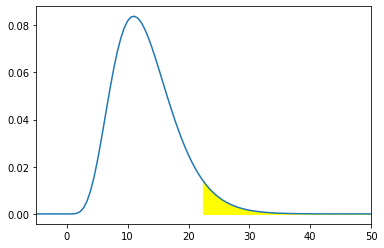

In [58]:
x_min = -5
x_max = 50

x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, data)
plt.xlim(x_min, x_max)
plt.plot(x, y)

chi2_critical_right = chi2_critical

x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, df1)
plt.fill_between(x1, y1, color='yellow')

In [59]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [60]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


<h4>Observation:</h4><ul><li>Uunique values observed of both the features.<li>Through chi-square test the null hypothesis failed.<li>Therefore, both the variables are dependent on each other. </ul>

<h4>Is there a relationship between gender and income?</h4>

In [61]:
df.income.value_counts()

0    33973
1    11202
Name: income, dtype: int64

In [62]:
df.gender.value_counts()

Male      30495
Female    14680
Name: gender, dtype: int64

In [63]:
con = pd.crosstab(df.gender, df.income)

In [64]:
con

income,0,1
gender,,
Female,13011,1669
Male,20962,9533


In [65]:
chi2_contingency(con)

(2101.5744045550996,
 0.0,
 1,
 array([[11039.81494189,  3640.18505811],
        [22933.18505811,  7561.81494189]]))

In [67]:
chi2_test_stat = chi2_contingency(con)[0]
pval = chi2_contingency(con)[1]
df1 = chi2_contingency(con)[2]

In [68]:
confidence_level = 0.95
alpha = 1 - confidence_level
chi2_critical = chi2.ppf(1 - alpha, df1)
chi2_critical

3.841458820694124

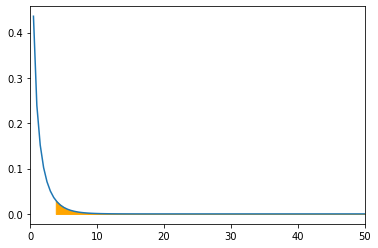

In [69]:
x_min = 0
x_max = 50

x = np.linspace(x_min, x_max, 100)
y = chi2.pdf(x, df1)
plt.xlim(x_min, x_max)
plt.plot(x, y)

chi2_critical_right = chi2_critical

x1 = np.linspace(chi2_critical_right, x_max, 100)
y1 = chi2.pdf(x1, data)
plt.fill_between(x1, y1, color='orange')

In [70]:
if(chi2_test_stat > chi2_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [71]:
if(pval < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


<h4>Observation:</h4><ul><li>WUnnique values observed for both the features.<li>Through chi-square test the null hypothesis failed.<li>Therefore, both the variables are dependent on each other. </ul>

<h1>Conclusion:</h1>
<ul><li>Relationships between different columns obtained and are vitally needed.<li>Data cleaning is required.<li>Special characters should be removed including Null values.<li>Data mapping established.</ul>

<h1>Data Preparation:</h1>

In [72]:
X = df[['workclass', 'education', 'marital status', 'occupation', 'relationship', 'race', 'gender']]
y = df['income']

In [74]:
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size= 0.75, random_state= 0)

In [81]:
x_train

,workclass,education,marital status,occupation,relationship,race,gender
979,Self-emp-not-inc,Prof-school,Divorced,Prof-specialty,Unmarried,White,Male
7075,Private,Some-college,Never-married,Adm-clerical,Own-child,Black,Female
8468,Local-gov,Some-college,Widowed,Adm-clerical,Not-in-family,White,Female
35080,Private,Some-college,Never-married,Sales,Own-child,White,Female
24564,Private,Assoc-voc,Married-civ-spouse,Exec-managerial,Husband,White,Male
...,...,...,...,...,...,...,...
32871,Private,Assoc-acdm,Divorced,Adm-clerical,Not-in-family,Black,Male
23005,Self-emp-not-inc,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male
46059,Private,HS-grad,Married-civ-spouse,Handlers-cleaners,Husband,White,Male
47094,Local-gov,Assoc-acdm,Never-married,Adm-clerical,Not-in-family,White,Female


In [82]:
y_train

979      1
7075     0
8468     0
35080    0
24564    1
        ..
32871    0
23005    0
46059    1
47094    0
2958     0
Name: income, Length: 33881, dtype: int32

In [83]:
x_test

,workclass,education,marital status,occupation,relationship,race,gender
32612,Federal-gov,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Black,Male
1697,Private,Assoc-voc,Widowed,Adm-clerical,Unmarried,White,Female
25071,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female
26364,Self-emp-not-inc,7th-8th,Married-civ-spouse,Farming-fishing,Husband,White,Male
13858,Private,Some-college,Never-married,Exec-managerial,Not-in-family,White,Female
...,...,...,...,...,...,...,...
48826,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female
302,Local-gov,Some-college,Divorced,Adm-clerical,Unmarried,White,Female
23045,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male
2121,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male


In [84]:
y_test

32612    1
1697     0
25071    1
26364    0
13858    0
        ..
48826    1
302      0
23045    1
2121     1
40411    0
Name: income, Length: 11294, dtype: int32

In [85]:
x_train.dtypes

workclass         object
education         object
marital status    object
occupation        object
relationship      object
race              object
gender            object
dtype: object

In [86]:
x_train['workclass'].value_counts(normalize=True)

Private             0.736903
Self-emp-not-inc    0.083292
Local-gov           0.069360
State-gov           0.043151
Self-emp-inc        0.036245
Federal-gov         0.030548
Without-pay         0.000502
Name: workclass, dtype: float64

In [87]:
x_train['education'].value_counts(normalize=True)

HS-grad         0.328267
Some-college    0.219149
Bachelors       0.165609
Masters         0.054780
Assoc-voc       0.043948
11th            0.036451
Assoc-acdm      0.033795
10th            0.026564
7th-8th         0.018240
Prof-school     0.016824
9th             0.014580
12th            0.012869
Doctorate       0.012308
5th-6th         0.010035
1st-4th         0.005047
Preschool       0.001535
Name: education, dtype: float64

In [88]:
x_train['marital status'].value_counts(normalize=True)

Married-civ-spouse       0.468345
Never-married            0.321744
Divorced                 0.138455
Separated                0.030666
Widowed                  0.028157
Married-spouse-absent    0.011865
Married-AF-spouse        0.000767
Name: marital status, dtype: float64

In [89]:
x_train['occupation'].value_counts(normalize=True)

Prof-specialty       0.133497
Exec-managerial      0.132464
Craft-repair         0.132109
Adm-clerical         0.122606
Sales                0.120156
Other-service        0.107081
Machine-op-inspct    0.065346
Transport-moving     0.051976
Handlers-cleaners    0.044833
Farming-fishing      0.031906
Tech-support         0.030666
Protective-serv      0.021841
Priv-house-serv      0.005165
Armed-Forces         0.000354
Name: occupation, dtype: float64

In [90]:
x_train['relationship'].value_counts(normalize=True)

Husband           0.415690
Not-in-family     0.256693
Own-child         0.146070
Unmarried         0.105546
Wife              0.046457
Other-relative    0.029545
Name: relationship, dtype: float64

In [91]:
x_train['race'].value_counts(normalize=True)

White                 0.859361
Black                 0.093828
Asian-Pac-Islander    0.029102
Amer-Indian-Eskimo    0.009947
Other                 0.007762
Name: race, dtype: float64

In [95]:
x_train['gender'].value_counts(normalize=True)

Male      0.675659
Female    0.324341
Name: gender, dtype: float64

In [97]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',min_frequency= 3000, sparse=False)
x_train_dt = pd.DataFrame(encoder.fit_transform(x_train), 
                               columns=encoder.get_feature_names_out(x_train.columns), 
                               index = x_train.index)
x_train_dt

,workclass_infrequent_sklearn,education_HS-grad,education_Some-college,education_infrequent_sklearn,marital status_Married-civ-spouse,marital status_Never-married,marital status_infrequent_sklearn,occupation_Craft-repair,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_infrequent_sklearn,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_infrequent_sklearn,race_White,race_infrequent_sklearn,gender_Male
979,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7075,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8468,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
35080,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
24564,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32871,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23005,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
46059,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
47094,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [98]:
x_train_dt1 = pd.DataFrame(index=x_train.index)
x_train_dt1

""
979
7075
8468
35080
24564
...
32871
23005
46059
47094


In [99]:
x_test

,workclass,education,marital status,occupation,relationship,race,gender
32612,Federal-gov,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Black,Male
1697,Private,Assoc-voc,Widowed,Adm-clerical,Unmarried,White,Female
25071,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female
26364,Self-emp-not-inc,7th-8th,Married-civ-spouse,Farming-fishing,Husband,White,Male
13858,Private,Some-college,Never-married,Exec-managerial,Not-in-family,White,Female
...,...,...,...,...,...,...,...
48826,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female
302,Local-gov,Some-college,Divorced,Adm-clerical,Unmarried,White,Female
23045,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male
2121,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male


In [100]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11294 entries, 32612 to 40411
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       11294 non-null  object
 1   education       11294 non-null  object
 2   marital status  11294 non-null  object
 3   occupation      11294 non-null  object
 4   relationship    11294 non-null  object
 5   race            11294 non-null  object
 6   gender          11294 non-null  object
dtypes: object(7)
memory usage: 705.9+ KB


In [105]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',min_frequency= 1000, sparse=False)
x_test_dt = pd.DataFrame(encoder.fit_transform(x_test), 
                               columns=encoder.get_feature_names_out(x_test.columns), 
                               index = x_test.index)

x_test_dt

,workclass_infrequent_sklearn,education_HS-grad,education_Some-college,education_infrequent_sklearn,marital status_Married-civ-spouse,marital status_Never-married,marital status_infrequent_sklearn,occupation_Craft-repair,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_infrequent_sklearn,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_infrequent_sklearn,race_White,race_infrequent_sklearn,gender_Male
32612,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1697,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
25071,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
26364,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
13858,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48826,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
302,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
23045,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2121,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [106]:
print(x_train_dt.shape, x_test_dt.shape,y_train.shape,y_test.shape)

(33881, 20) (11294, 20) (33881,) (11294,)


<h1>Data Modelling + Evaluation:</h1>

<h4 style="color:red">Logistic Regression:</h4>

In [107]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train_dt, y_train)

LogisticRegression(random_state=0)

In [108]:
y_pred = classifier.predict(x_test_dt)

In [109]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [113]:
print('Logistic Regression Results:')
ac_sc_lr= round(accuracy_score(y_test, y_pred) * 100, 2)
f1_sc_lr= round(f1_score(y_test, y_pred) * 100, 2)
pr_sc_lr= round(precision_score(y_test, y_pred) * 100, 2)
print('Accuracy score is', ac_sc_lr)
print('F1 score is', f1_sc_lr)
print('Precision score is', pr_sc_lr)

Logistic Regression Results:
Accuracy score is 82.16
F1 score is 58.05
Precision score is 69.01


<h4 style="color:red">KNN Classifier:</h4>

In [114]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [115]:
knn.fit(x_train_dt, y_train)

KNeighborsClassifier()

In [116]:
y_pred_knn = knn.predict(x_test_dt)

In [117]:
print('KNN Classifier Results:')
ac_sc_knn= round(accuracy_score(y_test, y_pred_knn) * 100, 2)
f1_sc_knn= round(f1_score(y_test, y_pred_knn) * 100, 2)
pr_sc_knn= round(precision_score(y_test, y_pred_knn) * 100, 2)
print('Accuracy score is', ac_sc_knn)
print('F1 score is', f1_sc_knn)
print('Precision score is', pr_sc_knn)

KNN Classifier Results:
Accuracy score is 80.46
F1 score is 56.08
Precision score is 62.85


<h4 style="color:red">Naive Bayes Classifier:</h4>

In [118]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [119]:
nb.fit(x_train_dt, y_train)

GaussianNB()

In [120]:
y_pred_nb = nb.predict(x_test_dt)

In [121]:
print('Naive Bayes Classifier Results:')
ac_sc_nb= round(accuracy_score(y_test, y_pred_nb) * 100, 2)
f1_sc_nb= round(f1_score(y_test, y_pred_nb) * 100, 2)
pr_sc_nb= round(precision_score(y_test, y_pred_nb) * 100, 2)
print('Accuracy score is', ac_sc_nb)
print('F1 score is', f1_sc_nb)
print('Precision score is', pr_sc_nb)

Naive Bayes Classifier Results:
Accuracy score is 72.44
F1 score is 60.4
Precision score is 46.75


<h4 style="color:red">Support Vector Classifier:</h4>

In [122]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [123]:
svc.fit(x_train_dt, y_train)

SVC(random_state=42)

In [124]:
y_pred_svc = svc.predict(x_test_dt)

In [125]:
print('Support Vector Classifier Results:')
ac_sc_svc= round(accuracy_score(y_test, y_pred_svc) * 100, 2)
f1_sc_svc= round(f1_score(y_test, y_pred_svc) * 100, 2)
pr_sc_svc= round(precision_score(y_test, y_pred_svc) * 100, 2)
print('Accuracy score is', ac_sc_svc)
print('F1 score is', f1_sc_svc)
print('Precision score is', pr_sc_svc)

Support Vector Classifier Results:
Accuracy score is 82.41
F1 score is 58.27
Precision score is 70.12


<h4 style="color:red">Decision Tree Classifier:</h4>

In [126]:
from sklearn.tree import DecisionTreeClassifier
dc_tree = DecisionTreeClassifier(random_state=42)

In [127]:
dc_tree.fit(x_train_dt, y_train)

DecisionTreeClassifier(random_state=42)

In [128]:
y_pred_dc_tree = dc_tree.predict(x_test_dt)

In [129]:
print('Decision Tree Classifier Results:')
ac_sc_dt= round(accuracy_score(y_test, y_pred_dc_tree) * 100, 2)
f1_sc_dt= round(f1_score(y_test, y_pred_dc_tree) * 100, 2)
pr_sc_dt= round(precision_score(y_test, y_pred_dc_tree) * 100, 2)
print('Accuracy score is', ac_sc_dt )
print('F1 score is', f1_sc_dt)
print('Precision score is', pr_sc_dt)

Decision Tree Classifier Results:
Accuracy score is 81.94
F1 score is 57.99
Precision score is 67.92


<h4 style="color:red">Random Forest Classifier:</h4>

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [131]:
rf.fit(x_train_dt, y_train)

RandomForestClassifier(random_state=42)

In [132]:
y_pred_rf = rf.predict(x_test_dt)

In [133]:
print('Random Forest Classifier Results:')
ac_sc_rf= round(accuracy_score(y_test, y_pred_rf) * 100, 2)
f1_sc_rf= round(f1_score(y_test, y_pred_rf) * 100, 2)
pr_sc_rf= round(precision_score(y_test, y_pred_rf) * 100, 2)
print('Accuracy score is', ac_sc_rf)
print('F1 score is', f1_sc_rf)
print('Precision score is', pr_sc_rf)

Random Forest Classifier Results:
Accuracy score is 81.96
F1 score is 58.25
Precision score is 67.8


<h4 style="color:red">XGB Classifier: </h4>

In [134]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [135]:
xgb.fit(x_train_dt, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [136]:
y_pred_xgb = xgb.predict(x_test_dt)

In [137]:
print('XGB Classifier Results:')
ac_sc_xgb= round(accuracy_score(y_test, y_pred_xgb) * 100, 2)
f1_sc_xgb= round(f1_score(y_test, y_pred_xgb) * 100, 2)
pr_sc_xgb= round(precision_score(y_test, y_pred_xgb) * 100, 2)
print('Accuracy score is',ac_sc_xgb )
print('F1 score is',f1_sc_xgb )
print('Precision score is',pr_sc_xgb )

XGB Classifier Results:
Accuracy score is 82.15
F1 score is 58.55
Precision score is 68.43


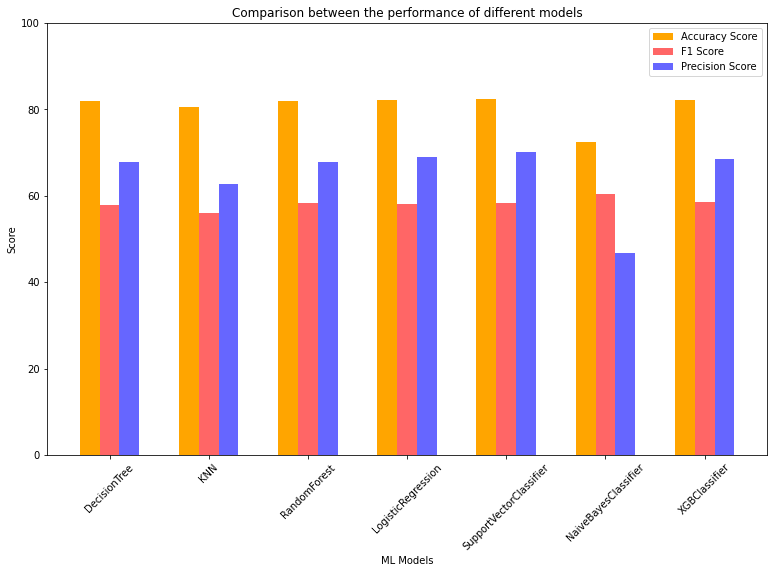

In [139]:
fig = plt.figure()
fig.set_size_inches(10,6)
ax = fig.add_axes([0,0,1,1])
ax.set_ylim(0, 100)
plt.ylabel('Score')
plt.xlabel('ML Models')
plt.title("Comparison between the performance of different models")
label = ['DecisionTree', 'KNN', 'RandomForest','LogisticRegression', 'SupportVectorClassifier', 'NaiveBayesClassifier','XGBClassifier']
df2 = [[f1_sc_dt, f1_sc_knn, f1_sc_rf, f1_sc_lr, f1_sc_svc, f1_sc_nb, f1_sc_xgb],[ac_sc_dt, ac_sc_knn, ac_sc_rf, ac_sc_lr, ac_sc_svc, ac_sc_nb, ac_sc_xgb], [pr_sc_dt, pr_sc_knn, pr_sc_rf, pr_sc_lr, pr_sc_svc, pr_sc_nb, pr_sc_xgb]]
x = np.arange(len(label))
ax.bar(x -0.20,df2[1],color='orange',width=0.2, label= 'Accuracy Score')
ax.bar(x ,df2[0],color='red',width=0.2, alpha=0.6, label= 'F1 Score')
ax.bar(x +0.20,df2[2],color='blue',width=0.2, alpha=0.6, label= 'Precision Score')
ax.set_xticks(x)
ax.set_xticklabels(label)
plt.xticks(rotation= 45)
plt.legend()
plt.show()

In [140]:
from prettytable import PrettyTable
columns = ["ML Models","Accuracy Score", "F1 Score", "Precision Score"]
t = PrettyTable()
t.add_column(columns[0], ['DecisionTree', 'KNN', 'RandomForest','LogisticRegression', 'SupportVectorClassifier', 'NaiveBayesClassifier','XGBClassifier'])
t.add_column(columns[1], [ac_sc_dt, ac_sc_knn, ac_sc_rf, ac_sc_lr, ac_sc_svc, ac_sc_nb, ac_sc_xgb])
t.add_column(columns[2], [f1_sc_dt, f1_sc_knn, f1_sc_rf, f1_sc_lr, f1_sc_svc, f1_sc_nb, f1_sc_xgb])
t.add_column(columns[3], [pr_sc_dt, pr_sc_knn, pr_sc_rf, pr_sc_lr, pr_sc_svc, pr_sc_nb, pr_sc_xgb])

In [141]:
t

ML Models,Accuracy Score,F1 Score,Precision Score
DecisionTree,81.94,57.99,67.92
KNN,80.46,56.08,62.85
RandomForest,81.96,58.25,67.8
LogisticRegression,82.16,58.05,69.01
SupportVectorClassifier,82.41,58.27,70.12
NaiveBayesClassifier,72.44,60.4,46.75
XGBClassifier,82.15,58.55,68.43


<h1>Conclusion:</h1>
<ul><li>The most optimized model is that of Support Vector Classifier and has Accuracy score , Precision and F1-score as 82.41%, 70.12% and 58.27% respectively.<li>Accuracy of model can be increased based on more various features of the data.<li>Optimization of model should be considered as major priority based on different parameters.</ul>